# Analyzing the effect of snow on the King Street Pilot

We first import the data frame 'snow', which contains the pilot and baseline values for all datapoints for December, in addition to a binary flag corresponding to whether or not it snowed in that time period. 

In [1]:
# load snowflags
# %load snowflags.py
"""
Created on Tue Jan  9 16:33:28 2018

@author: alouis2
"""
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import datetime

# connect to database
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

# run query
sql = pg.SQL('''select pilot.dt, pilot.street, pilot.direction, pilot.period, 
                pilot.tt as pilot, baseline.tt as baseline 
                from king_pilot.dash_daily_dev as pilot,  king_pilot.dash_baseline_dev as baseline 
                where (dt = '2017-12-11' or dt = '2017-12-12' or dt = '2017-12-13' 
                or dt = '2017-12-15' or dt = '2017-12-18' or dt = '2017-12-21' or dt = '2017-12-22' or dt = '2017-12-29')
                and category = 'Pilot' and  pilot.day_type = 'Weekday' and pilot.street = baseline.street 
                and pilot.direction = baseline.direction and pilot.day_type = baseline.day_type 
                and pilot.period = baseline.period order by dt, street, direction, period''')

snow = pandasql.read_sql(sql, con)

change = [snow.pilot.values[i]-snow.baseline.values[i] for i in range(len(snow))]
snow['change'] = change
flag = [0 for i in range(len(snow))]
snow['snow_flag'] = flag 


snow_periods = {datetime.date(2017,12,11):['AM Peak', 'PM Peak', 'Evening'], 
                datetime.date(2017,12,12):['AM Peak', 'Midday'],
                datetime.date(2017,12,13):['AM Peak', 'Evening'],
                datetime.date(2017,12,15):['Midday', 'PM Peak'],
                datetime.date(2017,12,18):['AM Peak'],
                datetime.date(2017,12,21):['Evening'],
                datetime.date(2017,12,22):['AM Peak', 'Midday', 'PM Peak'],
                datetime.date(2017,12,29):['AM Peak', 'Midday']}

for key in snow_periods:
    for i in snow_periods[key]:
        for j in range(len(snow)):
            if snow.dt.values[j] == key and snow.period.values[j] == i:
                snow.snow_flag.values[j] += 1        

In [2]:
# import relevant modules
import pandas as pd
import statistics as s
import datetime 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np

The flagged data is assigned to a variable. The summary statistics for snow can be seen in the output. It can be seen that across 301 flagged data points, there is not much difference in the means. This will be statistically proven later on in this notebook. 

In [3]:
flagged = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].snow_flag == 1)

flagged.loc[:, ['pilot', 'baseline']].describe()

,pilot,baseline
count,301.000000,301.000000
mean,8.565234,8.512015
std,4.286724,3.326533
min,3.013426,3.010564
25%,5.345084,5.412162
50%,7.606857,8.134944
75%,10.626819,11.254606
max,28.220400,17.270516


Below are the mean travel times for flagged data points; i.e, here the pilot mean represents travel times during periods of snow fall. 

In [112]:
flagged['pilot'].mean(), flagged['baseline'].mean()

(8.565233805600492, 8.512015087791028)

We conduct a hypothesis test for the mean travel times comparing the pilot with snowfall vs the baseline. Our hypothesis of interest is: 

$H_o: \mu_p = \mu_b$



$H_o: \mu_p \neq \mu_b$


In [99]:
 stats.ttest_ind(flagged['pilot'],flagged['baseline'])

Ttest_indResult(statistic=0.1701630551348865, pvalue=0.86493926585252778)

From the above, it can be seen that the pvalue is far from the alpha level 0.05. Therefore the result is not statistically significant, and we fail to reject the null hypothesis. 

## Sectioning by Street

To make things simpler, variables are assigned flagged data corresponds to a street. See the adelaide example below. 

In [8]:
adelaide = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].street == 'Adelaide' and snow.loc[i,].snow_flag==1)
bathurst = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Bathurst' and snow.loc[i,].snow_flag==1)
dundas = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Dundas'and snow.loc[i,].snow_flag==1)
front = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Front' and snow.loc[i,].snow_flag==1)
jarvis = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Jarvis' and snow.loc[i,].snow_flag==1)
queen = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Queen'and snow.loc[i,].snow_flag==1)
richmond = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Richmond'and snow.loc[i,].snow_flag==1)
spadina = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Spadina'and snow.loc[i,].snow_flag==1)
university = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'University'and snow.loc[i,].snow_flag==1)
wellington = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Wellington'and snow.loc[i,].snow_flag==1)
yonge = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Yonge'and snow.loc[i,].snow_flag==1)

adelaide

,dt,street,direction,period,pilot,baseline,change,snow_flag
0,2017-12-11,Adelaide,Eastbound,AM Peak,7.184190,7.864729,-0.680538,1
1,2017-12-11,Adelaide,Eastbound,Evening,6.146098,8.071130,-1.925032,1
3,2017-12-11,Adelaide,Eastbound,PM Peak,25.102782,14.699972,10.402809,1
75,2017-12-12,Adelaide,Eastbound,AM Peak,8.557612,7.864729,0.692884,1
77,2017-12-12,Adelaide,Eastbound,Midday,8.474195,9.410475,-0.936280,1
151,2017-12-13,Adelaide,Eastbound,AM Peak,8.887768,7.864729,1.023039,1
152,2017-12-13,Adelaide,Eastbound,Evening,9.825963,8.071130,1.754833,1
229,2017-12-15,Adelaide,Eastbound,Midday,12.168755,9.410475,2.758280,1
230,2017-12-15,Adelaide,Eastbound,PM Peak,21.242199,14.699972,6.542227,1
303,2017-12-18,Adelaide,Eastbound,AM Peak,7.655922,7.864729,-0.208807,1


The mean of the pilot and baseline values during specified dates are calculated below. This is done via the groupby method in pandas, which works identically as the GROUP BY query in SQL. 

In [26]:
dundasmean = dundas.groupby(['dt'], as_index=False).mean()
queenmean = queen.groupby(['dt'], as_index = False).mean()
richmondmean = richmond.groupby(['dt'], as_index = False).mean()
adelaidemean = adelaide.groupby(['dt'], as_index = False).mean()
wellingtonmean = wellington.groupby(['dt'], as_index = False).mean()
frontmean = front.groupby(['dt'], as_index = False).mean()
bathurstmean = bathurst.groupby(['dt'], as_index = False).mean()
spadinamean = spadina.groupby(['dt'], as_index = False).mean()
universitymean = university.groupby(['dt'], as_index = False).mean()
yongemean = yonge.groupby(['dt'], as_index = False).mean()
jarvismean = jarvis.groupby(['dt'], as_index = False).mean()

jarvismean

,dt,pilot,baseline,change,snow_flag
0,2017-12-11,7.989421,5.074266,2.915155,1
1,2017-12-12,4.350528,5.018501,-0.667973,1
2,2017-12-13,4.187402,4.285197,-0.097795,1
3,2017-12-15,8.891444,6.145886,2.745558,1
4,2017-12-18,4.687088,4.397635,0.289452,1
5,2017-12-21,4.275065,4.172759,0.102306,1
6,2017-12-22,4.608304,5.563135,-0.954832,1
7,2017-12-29,3.682889,5.018501,-1.335613,1


The following are plots containing mean pilot and mean baseline values calculated across the different dates. 

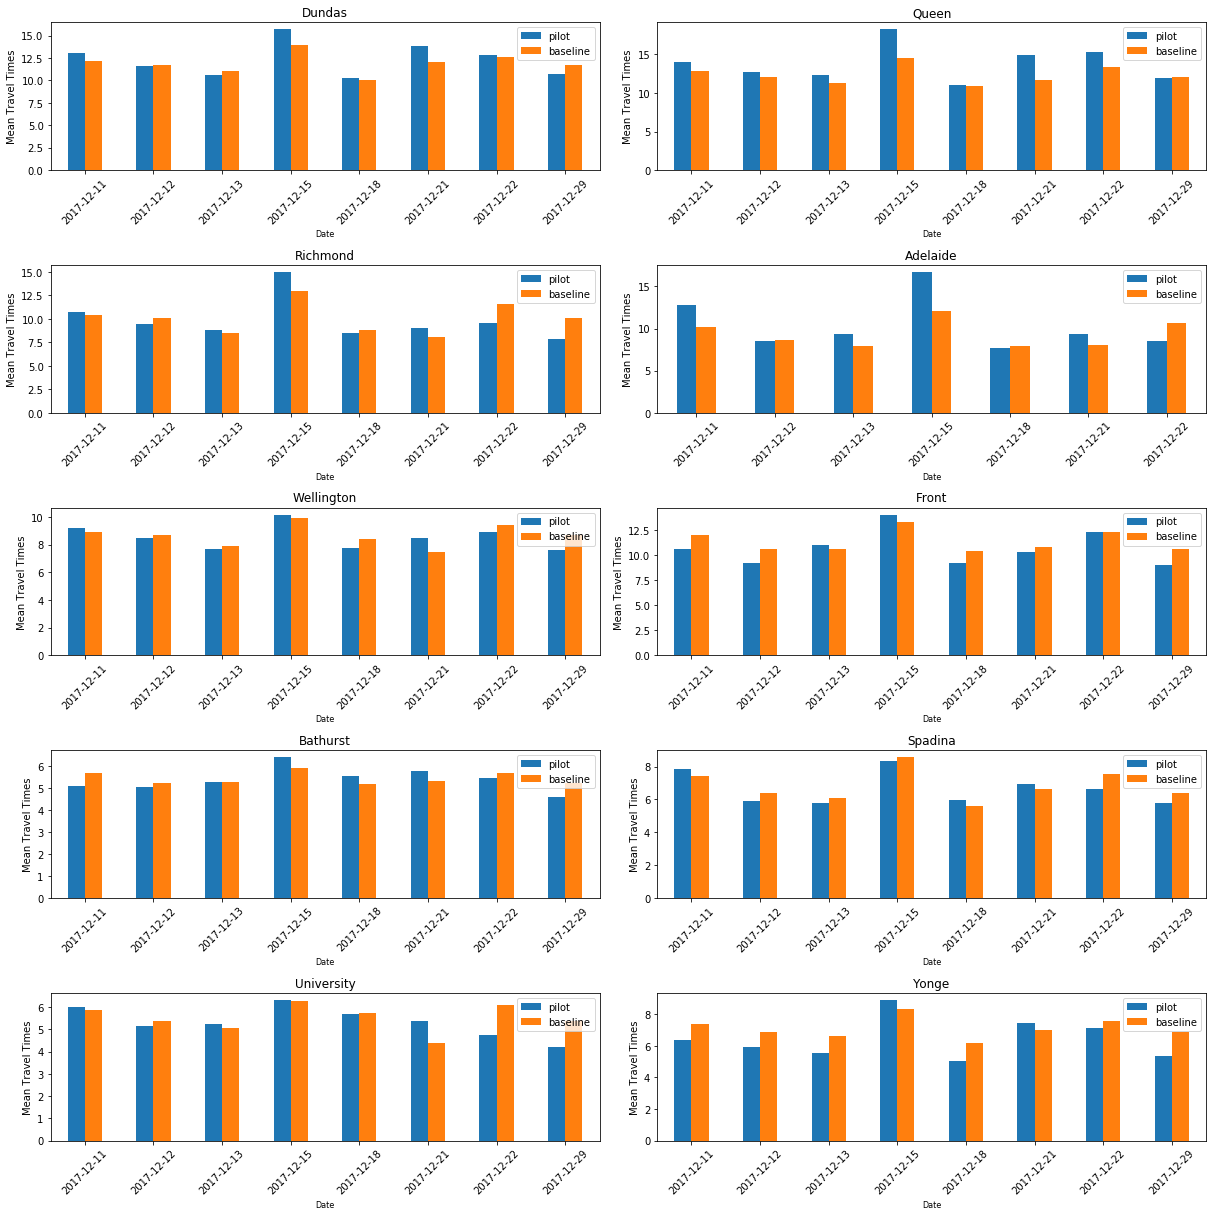

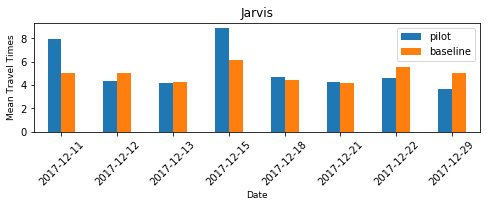

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=2)

ax1 = dundasmean[dundasmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Dundas', rot = 45, ax=axes[0,0], figsize = (17,17))
ax2 = queenmean[queenmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Queen', rot = 45, ax=axes[0,1],  figsize = (17,17))
ax3 = richmondmean[richmondmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Richmond', rot = 45, ax=axes[1,0],  figsize = (17,17))
ax4 = adelaidemean[adelaidemean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Adelaide', rot = 45, ax=axes[1,1],  figsize = (17,17))
ax5 = wellingtonmean[wellingtonmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Wellington', rot = 45, ax=axes[2,0],  figsize = (17,17))
ax6 = frontmean[frontmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Front', rot = 45, ax=axes[2,1],  figsize = (17,17))
ax7 = bathurstmean[bathurstmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Bathurst', rot = 45, ax=axes[3,0],  figsize = (17,17))
ax8 = spadinamean[spadinamean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Spadina', rot = 45, ax=axes[3,1],  figsize = (17,17))
ax9 = universitymean[universitymean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'University', rot = 45, ax=axes[4,0],  figsize = (17,17))
ax10 = yongemean[yongemean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Yonge', rot = 45, ax=axes[4,1],  figsize = (17,17))

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    i.set_xlabel('Date', fontsize=8)
    i.set_ylabel('Mean Travel Times', fontsize = 10)

plt.tight_layout()

ax11 = jarvismean[jarvismean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Jarvis', rot = 45, figsize = (8,2))
ax11.set_xlabel('Date', fontsize=9)
ax11.set_ylabel('Mean Travel Times', fontsize = 9)
plt.show()

Summary statistics for each street are assigned to various variables. An example for dundas is followed

In [45]:
dundasstats = dundas.loc[:, ['dt', 'pilot', 'baseline']].describe()
queenstats = queen.loc[:, ['dt', 'pilot', 'baseline']].describe()
richmondstats = richmond.loc[:, ['dt', 'pilot', 'baseline']].describe()
adelaidestats = adelaide.loc[:, ['dt', 'pilot', 'baseline']].describe()
wellingtonstats = wellington.loc[:, ['dt', 'pilot', 'baseline']].describe()
frontstats = front.loc[:, ['dt', 'pilot', 'baseline']].describe()
bathurststats = bathurst.loc[:, ['dt', 'pilot', 'baseline']].describe()
spadinastats = spadina.loc[:, ['dt', 'pilot', 'baseline']].describe()
universitystats = university.loc[:, ['dt', 'pilot', 'baseline']].describe()
yongestats = yonge.loc[:, ['dt', 'pilot', 'baseline']].describe()
jarvisstats = jarvis.loc[:, ['dt', 'pilot', 'baseline']].describe()

In [46]:
richmondstats

,pilot,baseline
count,16.000000,16.000000
mean,10.036180,10.378625
std,3.157040,2.390294
min,6.401094,8.102424
25%,8.430755,8.773356
50%,9.037049,8.773356
75%,10.629276,11.421083
max,17.281297,14.475418


For each street, we wish to test whether the pilot average during snow periods is different than the baseline average. We summarize the results in a dataframe. 

In [13]:
streettests = pd.DataFrame(np.array([['dundas', dundas['pilot'].mean(), dundas['baseline'].mean(), 
          stats.ttest_ind(dundas['pilot'],dundas['baseline']).statistic,
          stats.ttest_ind(dundas['pilot'],dundas['baseline']).pvalue],
            ['queen', queen['pilot'].mean(), queen['baseline'].mean(), 
          stats.ttest_ind(queen['pilot'],queen['baseline']).statistic,
          stats.ttest_ind(queen['pilot'],queen['baseline']).pvalue],
            ['richmond', richmond['pilot'].mean(), richmond['baseline'].mean(), 
          stats.ttest_ind(richmond['pilot'],richmond['baseline']).statistic,
          stats.ttest_ind(richmond['pilot'],richmond['baseline']).pvalue],         
            ['adelaide', adelaide['pilot'].mean(), adelaide['baseline'].mean(), 
          stats.ttest_ind(adelaide['pilot'],adelaide['baseline']).statistic,
          stats.ttest_ind(adelaide['pilot'],adelaide['baseline']).pvalue],
            ['wellington', wellington['pilot'].mean(), wellington['baseline'].mean(), 
          stats.ttest_ind(wellington['pilot'],wellington['baseline']).statistic,
          stats.ttest_ind(wellington['pilot'],wellington['baseline']).pvalue],
            ['front', front['pilot'].mean(), front['baseline'].mean(), 
          stats.ttest_ind(front['pilot'],front['baseline']).statistic,
          stats.ttest_ind(front['pilot'],front['baseline']).pvalue], 
            ['bathurst', bathurst['pilot'].mean(), bathurst['baseline'].mean(), 
          stats.ttest_ind(bathurst['pilot'],bathurst['baseline']).statistic,
          stats.ttest_ind(bathurst['pilot'],bathurst['baseline']).pvalue], 
            ['spadina', spadina['pilot'].mean(), spadina['baseline'].mean(), 
          stats.ttest_ind(spadina['pilot'],spadina['baseline']).statistic,
          stats.ttest_ind(spadina['pilot'],spadina['baseline']).pvalue],
            ['university', university['pilot'].mean(), university['baseline'].mean(), 
          stats.ttest_ind(university['pilot'],university['baseline']).statistic,
          stats.ttest_ind(university['pilot'],university['baseline']).pvalue],
            ['yonge', yonge['pilot'].mean(), yonge['baseline'].mean(), 
          stats.ttest_ind(yonge['pilot'],yonge['baseline']).statistic,
          stats.ttest_ind(yonge['pilot'],yonge['baseline']).pvalue],
            ['jarvis', jarvis['pilot'].mean(), jarvis['baseline'].mean(), 
          stats.ttest_ind(jarvis['pilot'],jarvis['baseline']).statistic,
          stats.ttest_ind(jarvis['pilot'],jarvis['baseline']).pvalue]
            ]),columns = ['street', 'pilot mean', 'baseline mean', 't-value', 'pvalue'])

streettests

,street,pilot mean,baseline mean,t-value,pvalue
0,dundas,12.436344988589598,12.08158217950039,0.558252497508,0.578682468949
1,queen,14.015083833664445,12.548041641837518,1.96597066222,0.0537839888016
2,richmond,10.03618005485169,10.3786245361001,-0.345916689444,0.731819507964
3,adelaide,10.726838066190018,9.704883915691047,0.619078371164,0.541251716458
4,wellington,8.653755621979402,8.831553668285256,-0.360107314933,0.721289820641
5,front,10.919616287445864,11.516214038511274,-0.853537132304,0.396756300252
6,bathurst,5.350669989231738,5.4896661710635115,-0.793906108419,0.430278263637
7,spadina,6.74610434840052,6.99523711888659,-0.508993707342,0.612563338346
8,university,5.306996631142266,5.628365780643773,-0.626240266029,0.533456268808
9,yonge,6.533952074502348,7.227267883343687,-1.75928136034,0.0834633434972


From the above, Dundas, Queen, Adelaide, and Jarvis had slower travel times. However, no street had a statistically significant result, i.e. the impact of snow was not statistically significant at the alpha level 0.05.

Notice that **Dundas, Queen, and Adelaide** belong to the same street segment, the *East-West Corridor*. This fact will be used later on in the analysis. 


While we reject the null for most streets, Queen and Yonge may be of interest for further investigation. Queen's pvalue borders on statistical significance, while Yonge is highly suggestive at p =0.0834 which would be significant at the 0.1 alpha level. 




## Sectioning by Time Period

We now section off the data into time periods, i.e. AM Peak, Midday, PM Peak, Evening. Snow may have differently affected each of these periods' travel times. 

First, we divide the data into separate period dataframes.

In [192]:
ampeak = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].period == 'AM Peak' and snow.loc[i,].snow_flag==1)
midday = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].period == 'Midday' and snow.loc[i,].snow_flag==1)
pmpeak = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].period == 'PM Peak' and snow.loc[i,].snow_flag==1)
evening = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i,].period == 'Evening' and snow.loc[i,].snow_flag==1)

The periods are grouped by date, and then graphed.

In [187]:
ampeakmean = ampeak.groupby(['dt'], as_index=False).mean()
middaymean = midday.groupby(['dt'], as_index=False).mean()
eveningmean = evening.groupby(['dt'], as_index=False).mean()
pmpeakmean = pmpeak.groupby(['dt'], as_index=False).mean()

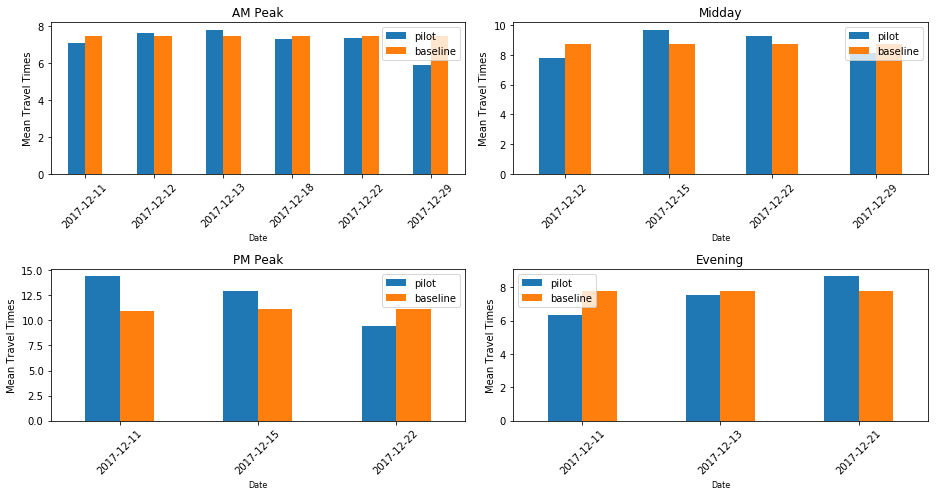

In [188]:
fig, axes = plt.subplots(nrows=2, ncols=2)

ax1 = ampeakmean[ampeakmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'AM Peak', rot = 45, ax=axes[0,0], figsize = (13,7))
ax2 = middaymean[middaymean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Midday', rot = 45, ax=axes[0,1],  figsize = (13,7))
ax3 = pmpeakmean[pmpeakmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'PM Peak', rot = 45, ax=axes[1,0],  figsize = (13,7))
ax4 = eveningmean[eveningmean.columns[0:3]].plot(kind='bar', x = 'dt', title = 'Evening', rot = 45, ax=axes[1,1],  figsize = (13,7))

for i in [ax1, ax2, ax3, ax4]:
    i.set_xlabel('Date', fontsize=8)
    i.set_ylabel('Mean Travel Times', fontsize = 10)


plt.tight_layout()
plt.show()


 From the above data, we have time periods and respective dates with slower travel times. 

* AM Peak:
    * 2017-12-12
    * 2017-12-13
* Midday:
    * 2017-12-15
    * 2017-12-22
* PM Peak:
    * 2017-12-11
    * 2017-12-15
* Evening: 
    * 2017-12-21

We conduct hypothesis tests for each of the periods. These hypotheses are the same as the ones conducted earlier. A Dataframe is created to summarize our results. 

In [183]:
periodtests = pd.DataFrame(np.array([['AM Peak', ampeak['pilot'].mean(), ampeak['baseline'].mean(), 
          stats.ttest_ind(ampeak['pilot'],ampeak['baseline']).statistic,
          stats.ttest_ind(ampeak['pilot'],ampeak['baseline']).pvalue],
            ['Midday', midday['pilot'].mean(), midday['baseline'].mean(), 
          stats.ttest_ind(midday['pilot'],midday['baseline']).statistic,
          stats.ttest_ind(midday['pilot'],midday['baseline']).pvalue],
            ['PM Peak', pmpeak['pilot'].mean(), pmpeak['baseline'].mean(), 
          stats.ttest_ind(pmpeak['pilot'],pmpeak['baseline']).statistic,
          stats.ttest_ind(pmpeak['pilot'],pmpeak['baseline']).pvalue],         
            ['Evening', evening['pilot'].mean(), evening['baseline'].mean(), 
          stats.ttest_ind(evening['pilot'],evening['baseline']).statistic,
          stats.ttest_ind(evening['pilot'],evening['baseline']).pvalue],]),
          columns = ['street', 'pilot mean', 'baseline mean', 't-value', 'pvalue'])

periodtests

,street,pilot mean,baseline mean,t-value,pvalue
0,AM Peak,7.176954026264695,7.459958068445224,-0.798876922459,0.425208009542
1,Midday,8.725693517437954,8.747869526764267,-0.0394433727484,0.968590057199
2,PM Peak,12.224722838785608,11.072013577128489,1.1786587429,0.241077418034
3,Evening,7.511018907684157,7.772250962531116,-0.470588469704,0.638849815694


From the above, we see that PM Peak had a slower travel time. None of the above pvalues show statistical significance at the 0.05 alpha level.

## Sectioning by Corridor and Time Period

Recall the streets that had slower travel times (seen below). Notice how, Dundas, Queen, and Adelaide belong to the same corridor: the east west corridor.

In [114]:
pd.DataFrame(streettests.loc[i,] for i in range(len(streettests)) if float(streettests.loc[i,][1]) > float(streettests.loc[i,][2]))

,street,pilot mean,baseline mean,t-value,pvalue
0,dundas,12.436344988589598,12.08158217950039,0.558252497508,0.578682468949
1,queen,14.015083833664445,12.548041641837518,1.96597066222,0.0537839888016
3,adelaide,10.726838066190018,9.704883915691047,0.619078371164,0.541251716458
10,jarvis,5.561240847561875,5.088672979143591,0.559705040184,0.577697216794


The two corridors are spearated into two dataframe variables. 

In [139]:
ewcorridor = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) 
            if snow.loc[i].street in ('Dundas', 'Queen', 'Richmond', 'Adelaide', 'Wellington', 'Front') 
            and snow.loc[i,].snow_flag==1)
nscorridor = pd.DataFrame(snow.loc[i,] for i in range(len(snow))
            if snow.loc[i].street in ('Bathurst', 'Spadina', 'University', 'Yonge', 'Jarvis')
            and snow.loc[i,].snow_flag==1)

The average pilot and baseline values are summarized for each corridor. 

In [189]:
ewcorridor.mean(), nscorridor.mean()

(pilot        11.589848
 baseline     11.265119
 change        0.324728
 snow_flag     1.000000
 dtype: float64, pilot        5.899793
 baseline     6.085842
 change      -0.186049
 snow_flag    1.000000
 dtype: float64)

As seen above, the East-West Corridor has a slower travel time, i.e. pilot = 11.59, baseline = 11.27

In [148]:
stats.ttest_ind(ewcorridor['pilot'],ewcorridor['baseline'])

Ttest_indResult(statistic=0.85817036517094525, pvalue=0.39153239391202033)

The corridors are grouped by periods and assigned to the variables ewperiods and nsperiods.  The averages for each corridors are seen below. 

In [145]:
ewperiods = ewcorridor.groupby(['period'], as_index=False).mean()
ewperiods

,period,pilot,baseline,change,snow_flag
0,AM Peak,9.631861,9.775955,-0.144094,1
1,Evening,10.047313,10.287946,-0.240633,1
2,Midday,12.054856,11.719328,0.335528,1
3,PM Peak,16.557019,14.704045,1.852973,1


In [162]:
nsperiods = nscorridor.groupby(['period'], as_index=False).mean()
nsperiods

,period,pilot,baseline,change,snow_flag
0,AM Peak,5.008453,5.414160,-0.405708,1
1,Evening,5.228354,5.508126,-0.279771,1
2,Midday,5.812676,6.147843,-0.335167,1
3,PM Peak,8.470066,7.924253,0.545814,1


Graphs of the results can be seen below. Notice how both corridors were affected at PM Peaks. 

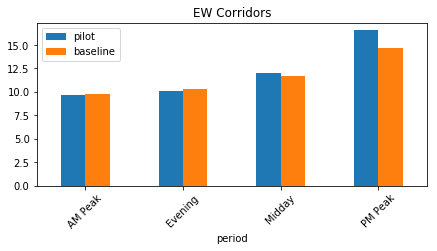

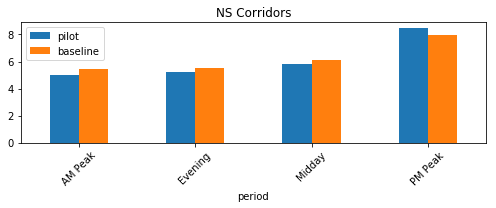

In [178]:
ax1 = ewperiods[ewperiods.columns[0:3]].plot(kind='bar', x = 'period', title = 'EW Corridors', rot = 45,  figsize = (7,3))
ax2 = nsperiods[nsperiods.columns[0:3]].plot(kind='bar', x = 'period', title = 'NS Corridors', rot = 45,  figsize = (7,3))

plt.tight_layout()
plt.show()

The periods with slower travel times are as follows: 

* East-West Corridor:
    * Midday
    * PM Peak
    
* North-South Corridor:
    * PM Peak 

We conduct tests on these periods. Dataframes are created containing data for only specific periods. 

In [163]:
ewmid = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) 
        if snow.loc[i].street in ('Dundas', 'Queen', 'Richmond', 'Adelaide', 'Wellington', 'Front') 
        and snow.loc[i].period == 'Midday'
        and snow.loc[i,].snow_flag==1)
stats.ttest_ind(ewmid['pilot'],ewmid['baseline'])

Ttest_indResult(statistic=0.63368773760230268, pvalue=0.52841042044690423)

In [164]:
ewpm = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) 
        if snow.loc[i].street in ('Dundas', 'Queen', 'Richmond', 'Adelaide', 'Wellington', 'Front') 
        and snow.loc[i].period == 'PM Peak'
        and snow.loc[i,].snow_flag==1)
stats.ttest_ind(ewpm['pilot'],ewpm['baseline'])

Ttest_indResult(statistic=1.9106745064614823, pvalue=0.061788961309187422)

In [176]:
nspm = pd.DataFrame(snow.loc[i,] for i in range(len(snow))
            if snow.loc[i].street in ('Bathurst', 'Spadina', 'University', 'Yonge', 'Jarvis')
            and snow.loc[i].period == 'PM Peak'
            and snow.loc[i,].snow_flag==1)
stats.ttest_ind(nspm['pilot'], nspm['baseline'])

Ttest_indResult(statistic=0.57519372488337961, pvalue=0.56738508025458811)

From the above, it can be seen that the p values are insignificant. However, the East-West corridor during PM Peak time contains borderline statistically significant results. Therefore it can be said that snow may have had potentially the most effect on the **East-West corridor during the PM Peak**. 

# Summary

* Dundas, Queen, Adelaide, and Jarvis had slower travel times. 
    * No street had a statistically significant result, i.e. the impact of snow was not statistically significant at the alpha level 0.05.
    * Queen was affected the greatest (1.47 change)- this borderlined on statistical significance
    * Dundas was affected the least (0.355 change)


* For time periods, PM Peak had a slower mean travel time
    * No statistical significance, but had 1.153 change in travel time


* For time periods, the periods with slower travel times were:
    * AM Peak:
        * 2017-12-12
        * 2017-12-13
    * Midday:
        * 2017-12-15
        * 2017-12-22
    * PM Peak:
        * 2017-12-11
        * 2017-12-15
    * Evening: 
        * 2017-12-21
        
        
        
* Since Dundas, Queen, and Adelaide are all part of the same corridor, we investigate the east-west and north-south corridors separately:
    * The East-West Corridor has a slower overall travel time, i.e. 0.325 change in travel time
        * Midday and PM Peak affected this. PM Peak had the biggest impact 1.852973
            * East-West corridor during PM Peak time contained borderline statistically significant results
    * The North-South Corridor seemed unaffected overall
        * PM Peak was the only period with a slower travel time

### Investigating Individual Streets (optional)

In [83]:
dundaspmean = dundas.groupby(['period'], as_index=False).mean()
dundaspmean

,period,pilot,baseline,change,snow_flag
0,AM Peak,10.108126,10.015923,0.092203,1
1,Evening,11.200326,12.002505,-0.802179,1
2,Midday,13.377366,13.505929,-0.128562,1
3,PM Peak,17.074107,14.392849,2.681257,1


In [133]:
dundasam = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Dundas'and snow.loc[i,].period == 'AM Peak' and snow.loc[i,].snow_flag==1)
dundaspm = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Dundas'and snow.loc[i,].period == 'PM Peak' and snow.loc[i,].snow_flag==1)
stats.ttest_ind(dundasam['pilot'],dundasam['baseline']), stats.ttest_ind(dundaspm['pilot'],dundaspm['baseline'])

(Ttest_indResult(statistic=0.22134975093443543, pvalue=0.82686172292134286),
 Ttest_indResult(statistic=2.4430699773973186, pvalue=0.034666418431623172))

In [125]:
queenpmean = queen.groupby(['period'], as_index=False).mean()
queenpmean

,period,pilot,baseline,change,snow_flag
0,AM Peak,11.480984,10.865098,0.615885,1
1,Evening,12.260128,11.665055,0.595074,1
2,Midday,14.847643,13.251367,1.596275,1
3,PM Peak,19.728161,15.859147,3.869014,1


In [122]:
queenam = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Queen'and snow.loc[i,].period == 'AM Peak' and snow.loc[i,].snow_flag==1)
queenevening = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Queen'and snow.loc[i,].period == 'Evening' and snow.loc[i,].snow_flag==1)
queenmid = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Queen'and snow.loc[i,].period == 'Midday' and snow.loc[i,].snow_flag==1)
queenpm = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Queen'and snow.loc[i,].period == 'PM Peak' and snow.loc[i,].snow_flag==1)

stats.ttest_ind(queenam['pilot'],queenam['baseline']), stats.ttest_ind(queenevening['pilot'],queenevening['baseline']), stats.ttest_ind(queenpm['pilot'],queenpm['baseline']), stats.ttest_ind(queenmid['pilot'],queenmid['baseline'])

(Ttest_indResult(statistic=1.3841478798375544, pvalue=0.18019481652619276),
 Ttest_indResult(statistic=0.60923617493434712, pvalue=0.55595546863679934),
 Ttest_indResult(statistic=2.4829434612551511, pvalue=0.03237919139582527),
 Ttest_indResult(statistic=2.707595655026986, pvalue=0.017001812213102416))

In [100]:
adelaidepmean = adelaide.groupby(['period'], as_index=False).mean()
adelaidepmean

,period,pilot,baseline,change,snow_flag
0,AM Peak,7.929086,7.864729,0.064358,1
1,Evening,8.434528,8.071130,0.363398,1
2,Midday,10.178612,9.410475,0.768138,1
3,PM Peak,18.230293,14.699972,3.530321,1


In [117]:
adelaideam = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Adelaide'and snow.loc[i,].period == 'AM Peak' and snow.loc[i,].snow_flag==1)
adelaideevening = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Adelaide'and snow.loc[i,].period == 'Evening' and snow.loc[i,].snow_flag==1)
adelaidemid = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Adelaide'and snow.loc[i,].period == 'Midday' and snow.loc[i,].snow_flag==1)
adelaidepm = pd.DataFrame(snow.loc[i,] for i in range(len(snow)) if snow.loc[i].street == 'Adelaide'and snow.loc[i,].period == 'PM Peak' and snow.loc[i,].snow_flag==1)


stats.ttest_ind(adelaideam['pilot'],adelaideam['baseline']),stats.ttest_ind(adelaideevening['pilot'],adelaideevening['baseline']),stats.ttest_ind(adelaidemid['pilot'],adelaidemid['baseline']),stats.ttest_ind(adelaidepm['pilot'],adelaidepm['baseline'])

(Ttest_indResult(statistic=0.19113445611351362, pvalue=0.8531819712425277),
 Ttest_indResult(statistic=0.31515329254091756, pvalue=0.76840168484721372),
 Ttest_indResult(statistic=0.71384730944972619, pvalue=0.51476255310658536),
 Ttest_indResult(statistic=0.69682531741073039, pvalue=0.52428596448011655))